In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
!pip install MDAnalysis
import MDAnalysis as mda
u = mda.Universe('Analysis/step5_1.tpr', 'Analysis/trajout.xtc')

# Load your GROMACS topology and trajectory files
u = mda.Universe('Analysis/step5_1.tpr', 'Analysis/trajout.xtc')

# Define the selection of atoms or the group of interest
# For example, you could select the entire protein or specific residues
# You can modify the selection depending on your system
atom_group = u.select_atoms('protein')  # or use a more specific selection

# Initialize arrays to store the results
times = []
end_to_end_distances = []
radii_of_gyration = []

# Iterate over the trajectory to calculate end-to-end distance and radius of gyration
for ts in u.trajectory:
    times.append(ts.time)
    
    # End-to-end distance (you can modify the atoms for specific selections)
    distance = np.linalg.norm(atom_group.positions[-1] - atom_group.positions[0])
    end_to_end_distances.append(distance)
    
    # Radius of gyration
    Rg = atom_group.radius_of_gyration()
    radii_of_gyration.append(Rg)

# Convert lists to numpy arrays
times = np.array(times)
end_to_end_distances = np.array(end_to_end_distances)
radii_of_gyration = np.array(radii_of_gyration)

# Plot End-to-End Distance vs Time
plt.figure(figsize=(10, 6))
plt.plot(times, end_to_end_distances, label='End-to-End Distance')
plt.xlabel('Time (ps)')
plt.ylabel('End-to-End Distance (nm)')
plt.title('End-to-End Distance vs Time')
plt.legend()
plt.grid(True)
plt.savefig('Figures/end_to_end_distance_vs_time.png')  # Save figure
plt.show()

# Plot Radius of Gyration vs Time
plt.figure(figsize=(10, 6))
plt.plot(times, radii_of_gyration, label='Radius of Gyration')
plt.xlabel('Time (ps)')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Radius of Gyration vs Time')
plt.legend()
plt.grid(True)
plt.savefig('Figures/radius_of_gyration_vs_time.png')  # Save figure
plt.show()

Defaulting to user installation because normal site-packages is not writeable


/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: 'Analysis/step5_1.tpr'

In [2]:
import os
print(os.path.isfile('Analysis/step5_1.tpr'))


False


In [3]:
import os
print(os.path.isfile('Analysis/step5_1.tpr'))

False


In [4]:
u = mda.Universe('/absolute/path/to/step5_1.tpr', '/absolute/path/to/trajout.xtc')


FileNotFoundError: [Errno 2] No such file or directory: '/absolute/path/to/step5_1.tpr'

In [1]:
pip install MDAnalysis matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import os

# Set your file paths
polystat_data = np.loadtxt(trajout.xtc)
rgyration_data = np.loadtxt(trajout.xtc)

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load your GROMACS topology and trajectory files
u = mda.Universe(tpr_file, xtc_file)

# Select the atoms of interest, e.g., all atoms, or a protein backbone, etc.
atom_group = u.select_atoms('protein')  # Modify the selection as needed

# Initialize arrays to store the results
times = []
end_to_end_distances = []
radii_of_gyration = []

# Iterate over the trajectory to calculate end-to-end distance and radius of gyration
for ts in u.trajectory:
    times.append(ts.time)

    # End-to-end distance (e.g., between the first and last atom of the group)
    distance = np.linalg.norm(atom_group.positions[-1] - atom_group.positions[0])
    end_to_end_distances.append(distance)
    
    # Radius of gyration
    Rg = atom_group.radius_of_gyration()
    radii_of_gyration.append(Rg)

# Convert lists to numpy arrays
times = np.array(times)
end_to_end_distances = np.array(end_to_end_distances)
radii_of_gyration = np.array(radii_of_gyration)

# Plot End-to-End Distance vs Time
plt.figure(figsize=(10, 6))
plt.plot(times, end_to_end_distances, label='End-to-End Distance (nm)', color='blue')
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('End-to-End Distance (nm)', fontsize=14)
plt.title('End-to-End Distance vs Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'end_to_end_distance_vs_time.png'))  # Save figure
plt.show()

# Plot Radius of Gyration vs Time
plt.figure(figsize=(10, 6))
plt.plot(times, radii_of_gyration, label='Radius of Gyration (nm)', color='red')
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Radius of Gyration (nm)', fontsize=14)
plt.title('Radius of Gyration vs Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'radius_of_gyration_vs_time.png'))  # Save figure
plt.show()

NameError: name 'trajout' is not defined

In [4]:
import mdtraj as md

# Load the trajectory with MDTraj
traj = md.load('trajout.xtc', top='step5_1.tpr')

# Perform some analysis, for example, calculating the radius of gyration
rg = md.compute_rg(traj)
print(rg)

# You can also compute distances or other quantities


OSError: The topology is loaded by filename extension, and the detected ".tpr" format is not supported. Supported topology formats include ".pdb", ".pdb.gz", ".h5", ".lh5", ".prmtop", ".parm7", ".prm7", ".psf", ".mol2", ".hoomdxml", ".gro", ".arc", ".hdf5" and ".gsd".

In [7]:
import numpy as np
import os

# Set your file paths
protein_data = np.loadtxt('protein.xvg', comments=["@", "#"])

# Optionally, print the shape of the data to ensure it's loaded correctly
print("Protein data shape:", protein_data.shape)

# If you want to access specific columns, you can do so like this:
time = protein_data[:, 0]  # Assuming the first column is time
observable = protein_data[:, 1]  # Assuming the second column is some observable (e.g., end-to-end distance or radius of gyration)

# Print the first few rows as a sanity check
print(protein_data[:5, :])


OSError: protein.xvg not found.

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the paths
trajectory_file = "trajout.xtc"
topology_file = "step3_input.pdb"  
figures_folder = "Figures"

# Create the Figures folder if it doesn't exist
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

# Load the trajectory
traj = md.load(trajectory_file, top=topology_file)

# Calculate the end-to-end distance
# Assuming the first and last atom of the chain represents the ends
# Replace 'atom_indices' with the correct indices of the two atoms
atom_indices = [0, -1]  # Adjust based on your system
end_to_end_distances = md.compute_distances(traj, [atom_indices])

# Calculate the radius of gyration
radius_of_gyration = md.compute_rg(traj)

# Extract time
time = traj.time / 1000  # Convert time to nanoseconds if needed

# Plot end-to-end distance vs time
plt.figure(figsize=(8, 6))
plt.plot(time, end_to_end_distances, label="End-to-End Distance", color='b')
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Distance (nm)", fontsize=14)
plt.title("End-to-End Distance vs Time", fontsize=16)
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(figures_folder, "end_to_end_distance_vs_time.png"))
plt.show()

# Plot radius of gyration vs time
plt.figure(figsize=(8, 6))
plt.plot(time, radius_of_gyration, label="Radius of Gyration", color='r')
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Radius of Gyration (nm)", fontsize=14)
plt.title("Radius of Gyration vs Time", fontsize=16)
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(figures_folder, "radius_of_gyration_vs_time.png"))
plt.show()


ValueError: The topology and the trajectory files might not contain the same atoms
The input topology must contain all atoms even if you want to select a subset of them with atom_indices

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
polystat_data = np.loadtxt('distance.xvg', comments=["@", "#"])
rgyration_data = np.loadtxt('gyration.xvg', comments=["@", "#"])

In [7]:
time = polystat_data[:, 0]  # Time in ps
end_to_end_distance = polystat_data[:, 1]  # End-to-end distance in nm
radius_of_gyration = rgyration_data[:, 1]  # Radius of gyration in nm

In [8]:
# Create the Figures directory if it doesn't exist
if not os.path.exists("../Figures"):
    os.makedirs("../Figures")

In [9]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [11]:
plt.figure(num=1, figsize=(10, 8), dpi=100, facecolor='lightgray', edgecolor='blue')
plt.show()


<Figure size 1000x800 with 0 Axes>

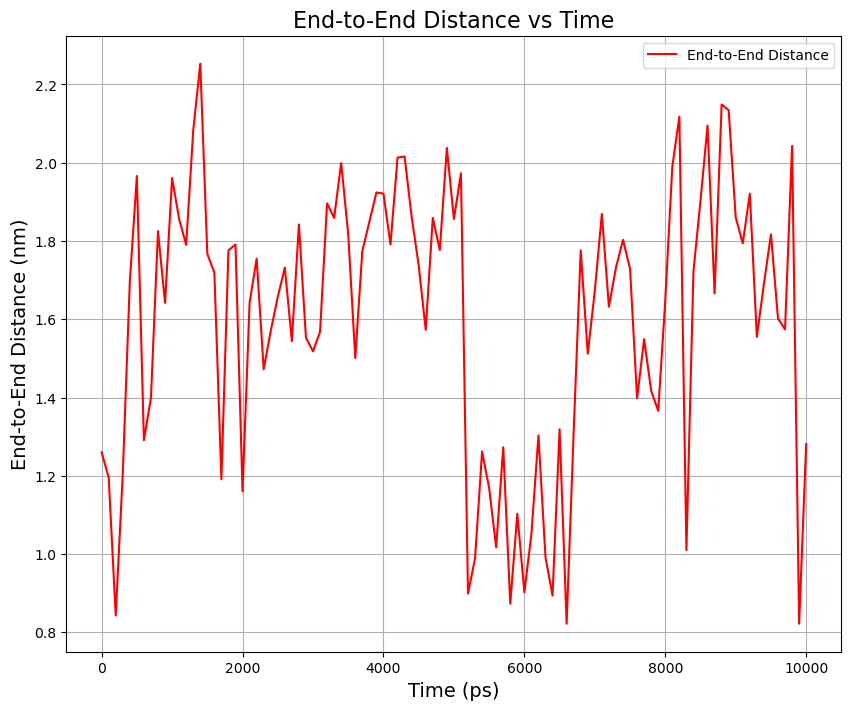

In [12]:
plt.figure(figsize=(10, 8))  # Create the figure with a size of 10x8 inches
plt.plot(time, end_to_end_distance, label='End-to-End Distance', color='r')  # Plot the data
plt.xlabel('Time (ps)', fontsize=14)  # Set x-axis label
plt.ylabel('End-to-End Distance (nm)', fontsize=14)  # Set y-axis label
plt.title('End-to-End Distance vs Time', fontsize=16)  # Set the title
plt.grid(True)  # Show grid
plt.legend()  # Show the legend
plt.show()  # Display the plot


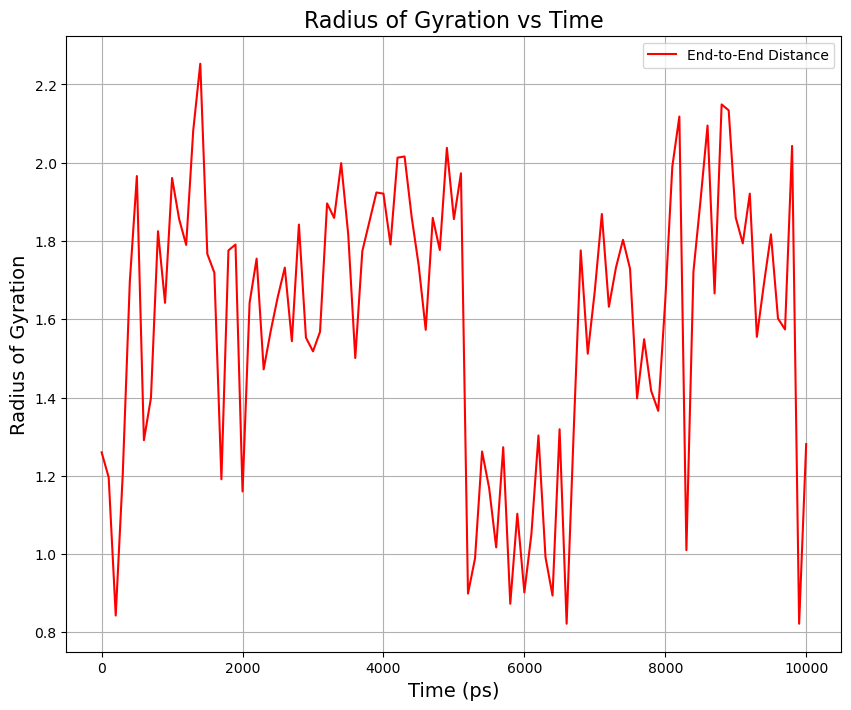

In [13]:
plt.figure(figsize=(10, 8))  # Create the figure with a size of 10x8 inches
plt.plot(time, end_to_end_distance, label='End-to-End Distance', color='r')  # Plot the data
plt.xlabel('Time (ps)', fontsize=14)  # Set x-axis label
plt.ylabel('Radius of Gyration', fontsize=14)  # Set y-axis label
plt.title('Radius of Gyration vs Time', fontsize=16)  # Set the title
plt.grid(True)  # Show grid
plt.legend()  # Show the legend
plt.show()  # Display the plot